# Pedram Babakhani (276848) Machine Learning Lab Exercise Sheet 10

In [79]:
from __future__ import print_function
#import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

MNIST dataset

In [80]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #MNIST dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


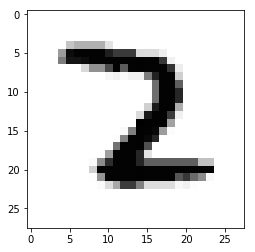

In [81]:
#one sample from dataset
plt.imshow(mnist.train.images[156].reshape(28,28), cmap="Greys")

In [82]:
#lets see the probability of the classess and which class 156th sample blongs to
mnist.train.labels[156]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

It means it belongs to class for number 2, because it hase more probability

In [83]:
##@set parameters to built the Neural network

In [84]:
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 100
display_step = 1

In [85]:
# Network Parameters
n_hidden_1 = 15 # 1st layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [86]:
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [87]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [88]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 15 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [89]:
# Construct model
logits = neural_net(X)

In [90]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [91]:
# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [92]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [93]:
#saver op for saving the model
saver = tf.train.Saver()

# Training

In [94]:
# Start training
accuracylist_first = list()
losslist_first = list()


with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
            accuracylist_first.append(acc)
            losslist_first.append(loss)
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    print("First Optimization Finished!")
    
    ####################
    ###save the model###
    ####################
    saver.save(sess, 'E:\Master Courses\Machine Learning Lab\Saved_model\model.ckpt')
    print("Model saved in file: %s" % "E:\Master Courses\Machine Learning Lab\Saved_model\model.ckpt")
    
    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
          sess.run(accuracy, feed_dict={X: mnist.test.images,Y: mnist.test.labels}))

Step 1, Minibatch Loss= 46.0375, Training Accuracy= 0.120
Step 2, Minibatch Loss= 25.4158, Training Accuracy= 0.210
Step 3, Minibatch Loss= 22.0305, Training Accuracy= 0.270
Step 4, Minibatch Loss= 15.7532, Training Accuracy= 0.330
Step 5, Minibatch Loss= 13.7676, Training Accuracy= 0.430
Step 6, Minibatch Loss= 12.4601, Training Accuracy= 0.510
Step 7, Minibatch Loss= 9.7452, Training Accuracy= 0.610
Step 8, Minibatch Loss= 8.3877, Training Accuracy= 0.670
Step 9, Minibatch Loss= 9.0267, Training Accuracy= 0.620
Step 10, Minibatch Loss= 8.7593, Training Accuracy= 0.610
Step 11, Minibatch Loss= 11.8405, Training Accuracy= 0.620
Step 12, Minibatch Loss= 7.9099, Training Accuracy= 0.680
Step 13, Minibatch Loss= 5.7418, Training Accuracy= 0.660
Step 14, Minibatch Loss= 3.1012, Training Accuracy= 0.740
Step 15, Minibatch Loss= 6.3757, Training Accuracy= 0.700
Step 16, Minibatch Loss= 4.2042, Training Accuracy= 0.780
Step 17, Minibatch Loss= 4.9925, Training Accuracy= 0.680
Step 18, Minibat

Step 192, Minibatch Loss= 0.6506, Training Accuracy= 0.870
Step 193, Minibatch Loss= 0.7184, Training Accuracy= 0.810
Step 194, Minibatch Loss= 0.6303, Training Accuracy= 0.820
Step 195, Minibatch Loss= 0.8018, Training Accuracy= 0.810
Step 196, Minibatch Loss= 1.0533, Training Accuracy= 0.800
Step 197, Minibatch Loss= 0.7642, Training Accuracy= 0.850
Step 198, Minibatch Loss= 0.5479, Training Accuracy= 0.890
Step 199, Minibatch Loss= 0.7548, Training Accuracy= 0.810
Step 200, Minibatch Loss= 0.5522, Training Accuracy= 0.900
Step 201, Minibatch Loss= 0.6115, Training Accuracy= 0.850
Step 202, Minibatch Loss= 0.7047, Training Accuracy= 0.870
Step 203, Minibatch Loss= 0.2940, Training Accuracy= 0.920
Step 204, Minibatch Loss= 0.8473, Training Accuracy= 0.830
Step 205, Minibatch Loss= 0.7003, Training Accuracy= 0.850
Step 206, Minibatch Loss= 0.6448, Training Accuracy= 0.860
Step 207, Minibatch Loss= 1.0630, Training Accuracy= 0.860
Step 208, Minibatch Loss= 1.0286, Training Accuracy= 0.8

Step 389, Minibatch Loss= 0.3972, Training Accuracy= 0.900
Step 390, Minibatch Loss= 0.5008, Training Accuracy= 0.880
Step 391, Minibatch Loss= 0.5561, Training Accuracy= 0.830
Step 392, Minibatch Loss= 0.5780, Training Accuracy= 0.850
Step 393, Minibatch Loss= 0.6469, Training Accuracy= 0.840
Step 394, Minibatch Loss= 0.5045, Training Accuracy= 0.860
Step 395, Minibatch Loss= 0.4773, Training Accuracy= 0.910
Step 396, Minibatch Loss= 0.3322, Training Accuracy= 0.930
Step 397, Minibatch Loss= 0.4321, Training Accuracy= 0.870
Step 398, Minibatch Loss= 0.6082, Training Accuracy= 0.850
Step 399, Minibatch Loss= 0.3128, Training Accuracy= 0.870
Step 400, Minibatch Loss= 0.3507, Training Accuracy= 0.890
Step 401, Minibatch Loss= 0.4980, Training Accuracy= 0.880
Step 402, Minibatch Loss= 0.4308, Training Accuracy= 0.850
Step 403, Minibatch Loss= 0.3341, Training Accuracy= 0.930
Step 404, Minibatch Loss= 0.7385, Training Accuracy= 0.820
Step 405, Minibatch Loss= 0.6799, Training Accuracy= 0.8

In [95]:
#tf.reset_default_graph()  

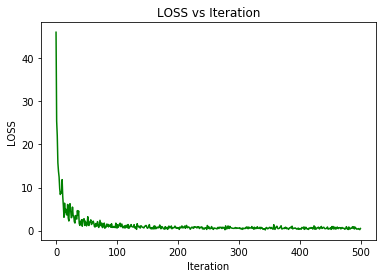

In [96]:
plt.plot(np.arange(num_steps),losslist_first,'g')
plt.xlabel('Iteration')
plt.ylabel('LOSS')
plt.title("LOSS vs Iteration")
plt.legend()
plt.show()

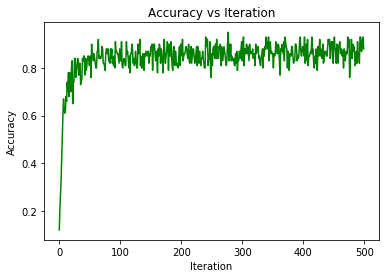

In [97]:
plt.plot(np.arange(num_steps),accuracylist_first,'g')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Iteration")
plt.legend()
plt.show()

In [98]:
# restore the model
with tf.Session() as sess:
    saver = tf.train.import_meta_graph("E:\Master Courses\Machine Learning Lab\Saved_model\model.meta")
    saver.restore(sess, "E:\Master Courses\Machine Learning Lab\Saved_model\model.ckpt")

INFO:tensorflow:Restoring parameters from E:\Master Courses\Machine Learning Lab\Saved_model\model.ckpt


# Restoring Trained Model

In [99]:
# Start training
accuracylist_second = list()
losslist_second = list()


with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    
    
    # restore the model
    saver = tf.train.import_meta_graph("E:\Master Courses\Machine Learning Lab\Saved_model\model.meta")
    saver.restore(sess, "E:\Master Courses\Machine Learning Lab\Saved_model\model.ckpt")
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
            accuracylist_second.append(acc)
            losslist_second.append(loss)
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    print("Optimization Finished!")   
   
    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
          sess.run(accuracy, feed_dict={X: mnist.test.images,Y: mnist.test.labels}))
    
 

INFO:tensorflow:Restoring parameters from E:\Master Courses\Machine Learning Lab\Saved_model\model.ckpt
Step 1, Minibatch Loss= 0.7393, Training Accuracy= 0.790
Step 2, Minibatch Loss= 0.4606, Training Accuracy= 0.890
Step 3, Minibatch Loss= 0.8352, Training Accuracy= 0.870
Step 4, Minibatch Loss= 0.5401, Training Accuracy= 0.850
Step 5, Minibatch Loss= 0.5240, Training Accuracy= 0.890
Step 6, Minibatch Loss= 0.4537, Training Accuracy= 0.890
Step 7, Minibatch Loss= 0.4881, Training Accuracy= 0.900
Step 8, Minibatch Loss= 0.1975, Training Accuracy= 0.930
Step 9, Minibatch Loss= 0.3955, Training Accuracy= 0.910
Step 10, Minibatch Loss= 0.8444, Training Accuracy= 0.820
Step 11, Minibatch Loss= 0.3715, Training Accuracy= 0.880
Step 12, Minibatch Loss= 0.7273, Training Accuracy= 0.870
Step 13, Minibatch Loss= 0.2273, Training Accuracy= 0.950
Step 14, Minibatch Loss= 0.3764, Training Accuracy= 0.870
Step 15, Minibatch Loss= 0.5723, Training Accuracy= 0.870
Step 16, Minibatch Loss= 0.4109, Tr

Step 172, Minibatch Loss= 1.2532, Training Accuracy= 0.820
Step 173, Minibatch Loss= 0.4567, Training Accuracy= 0.850
Step 174, Minibatch Loss= 0.9327, Training Accuracy= 0.870
Step 175, Minibatch Loss= 1.0525, Training Accuracy= 0.840
Step 176, Minibatch Loss= 0.7634, Training Accuracy= 0.860
Step 177, Minibatch Loss= 0.9234, Training Accuracy= 0.810
Step 178, Minibatch Loss= 0.5382, Training Accuracy= 0.890
Step 179, Minibatch Loss= 0.4645, Training Accuracy= 0.890
Step 180, Minibatch Loss= 0.5429, Training Accuracy= 0.830
Step 181, Minibatch Loss= 0.6095, Training Accuracy= 0.850
Step 182, Minibatch Loss= 0.2087, Training Accuracy= 0.950
Step 183, Minibatch Loss= 0.6137, Training Accuracy= 0.890
Step 184, Minibatch Loss= 0.4440, Training Accuracy= 0.880
Step 185, Minibatch Loss= 0.4430, Training Accuracy= 0.890
Step 186, Minibatch Loss= 0.5565, Training Accuracy= 0.800
Step 187, Minibatch Loss= 0.8619, Training Accuracy= 0.780
Step 188, Minibatch Loss= 0.8521, Training Accuracy= 0.8

Step 367, Minibatch Loss= 0.4628, Training Accuracy= 0.860
Step 368, Minibatch Loss= 0.8755, Training Accuracy= 0.800
Step 369, Minibatch Loss= 0.3758, Training Accuracy= 0.880
Step 370, Minibatch Loss= 0.9208, Training Accuracy= 0.820
Step 371, Minibatch Loss= 0.5328, Training Accuracy= 0.880
Step 372, Minibatch Loss= 0.8914, Training Accuracy= 0.800
Step 373, Minibatch Loss= 1.0074, Training Accuracy= 0.820
Step 374, Minibatch Loss= 0.8347, Training Accuracy= 0.800
Step 375, Minibatch Loss= 0.6026, Training Accuracy= 0.840
Step 376, Minibatch Loss= 0.8072, Training Accuracy= 0.780
Step 377, Minibatch Loss= 0.6863, Training Accuracy= 0.880
Step 378, Minibatch Loss= 0.9156, Training Accuracy= 0.860
Step 379, Minibatch Loss= 0.5103, Training Accuracy= 0.840
Step 380, Minibatch Loss= 0.6720, Training Accuracy= 0.820
Step 381, Minibatch Loss= 0.9297, Training Accuracy= 0.820
Step 382, Minibatch Loss= 1.2138, Training Accuracy= 0.810
Step 383, Minibatch Loss= 0.6809, Training Accuracy= 0.8

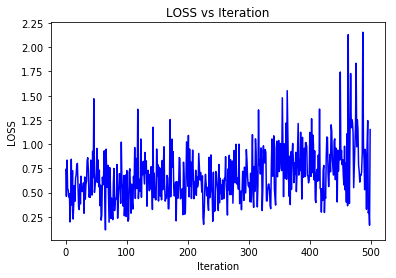

In [100]:
plt.plot(np.arange(num_steps),losslist_second,'b')
plt.xlabel('Iteration')
plt.ylabel('LOSS')
plt.title("LOSS vs Iteration")
plt.legend()
plt.show()

Accuracy

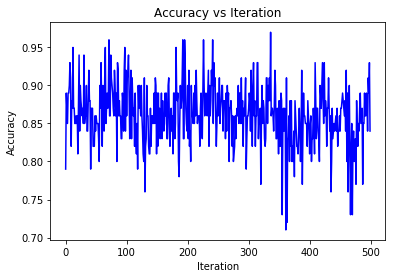

In [101]:
plt.plot(np.arange(num_steps),accuracylist_second,'b')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Iteration")
plt.legend()
plt.show()

# Compare Training and validation set

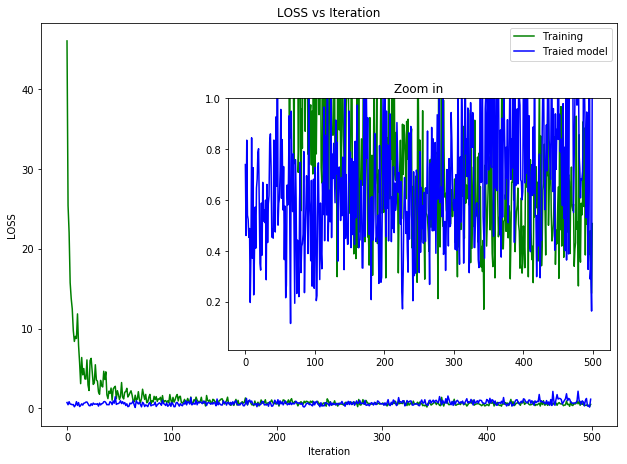

In [129]:
fig = plt.figure(figsize=(10,7))
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.36, 0.25, 0.53, 0.5])

axes1.plot(np.arange(num_steps),losslist_first,'g', label="Training")
axes1.plot(np.arange(num_steps),losslist_second,'b',label="Traied model")
axes1.set_xlabel('Iteration')
axes1.set_ylabel('LOSS')
axes1.set_title("LOSS vs Iteration")
axes1.legend()

# Plot zoom in graph
plt.ylim(ymax = 1, ymin = 0.01)
axes2.plot(np.arange(num_steps), losslist_first,'g', label='Training')
axes2.plot(np.arange(num_steps), losslist_second,'b', label='Validation')
axes2.set_title('Zoom in');

Accuracy

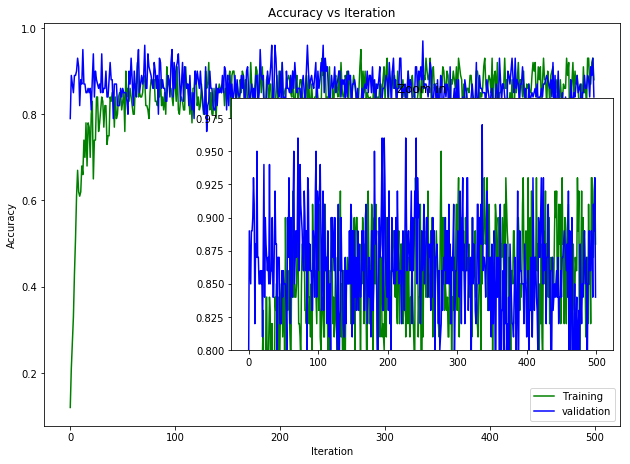

In [128]:
fig = plt.figure(figsize=(10,7))
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.36, 0.25, 0.53, 0.5])

axes1.plot(np.arange(num_steps),accuracylist_first,'g', label="Training")
axes1.plot(np.arange(num_steps),accuracylist_second,'b',label="validation")
axes1.set_xlabel('Iteration')
axes1.set_ylabel('Accuracy')
axes1.set_title("Accuracy vs Iteration")
axes1.legend()
# Plot zoom in graph
plt.ylim(ymax = 0.99, ymin = 0.80)
axes2.plot(np.arange(num_steps), accuracylist_first,'g', label='Training')
axes2.plot(np.arange(num_steps), accuracylist_second,'b', label='Validation')
axes2.set_title('Zoom in');

![MNIST](MNIST.gif "MNIST")

https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow

We saw that when we restore a trained model, loss will be least.

# Grid SearchCV

Lets implement a model with 2 hidden layers and evaluate it

In [112]:
# Network Parameters
n_hidden_1 = 15 # 1st layer number of neurons
n_hidden_2 = 25 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [113]:
# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [118]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [119]:
# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [120]:
# Construct model
logits = multilayer_perceptron(X)

In [121]:
multi_accuracylist = list()
multi_losslist = list()

In [122]:
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
            multi_accuracylist.append(acc)
            multi_losslist.append(loss)
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    print("Multi-layer neural network, Optimization Finished!")   
   
    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
          sess.run(accuracy, feed_dict={X: mnist.test.images,Y: mnist.test.labels}))
    
 

Step 1, Minibatch Loss= 197.6719, Training Accuracy= 0.170
Step 2, Minibatch Loss= 154.0677, Training Accuracy= 0.210
Step 3, Minibatch Loss= 74.9735, Training Accuracy= 0.490
Step 4, Minibatch Loss= 72.5598, Training Accuracy= 0.460
Step 5, Minibatch Loss= 81.2749, Training Accuracy= 0.450
Step 6, Minibatch Loss= 56.2266, Training Accuracy= 0.590
Step 7, Minibatch Loss= 32.0866, Training Accuracy= 0.610
Step 8, Minibatch Loss= 42.0044, Training Accuracy= 0.590
Step 9, Minibatch Loss= 34.7924, Training Accuracy= 0.630
Step 10, Minibatch Loss= 40.4481, Training Accuracy= 0.560
Step 11, Minibatch Loss= 38.9698, Training Accuracy= 0.600
Step 12, Minibatch Loss= 29.8942, Training Accuracy= 0.620
Step 13, Minibatch Loss= 37.4065, Training Accuracy= 0.600
Step 14, Minibatch Loss= 19.5835, Training Accuracy= 0.730
Step 15, Minibatch Loss= 20.7861, Training Accuracy= 0.770
Step 16, Minibatch Loss= 32.0993, Training Accuracy= 0.600
Step 17, Minibatch Loss= 21.3461, Training Accuracy= 0.660
Step

Step 161, Minibatch Loss= 1.7152, Training Accuracy= 0.850
Step 162, Minibatch Loss= 2.6932, Training Accuracy= 0.860
Step 163, Minibatch Loss= 2.0895, Training Accuracy= 0.770
Step 164, Minibatch Loss= 2.8869, Training Accuracy= 0.840
Step 165, Minibatch Loss= 1.9985, Training Accuracy= 0.860
Step 166, Minibatch Loss= 2.4251, Training Accuracy= 0.890
Step 167, Minibatch Loss= 2.1623, Training Accuracy= 0.830
Step 168, Minibatch Loss= 3.4944, Training Accuracy= 0.820
Step 169, Minibatch Loss= 1.4080, Training Accuracy= 0.850
Step 170, Minibatch Loss= 2.3448, Training Accuracy= 0.880
Step 171, Minibatch Loss= 1.4363, Training Accuracy= 0.850
Step 172, Minibatch Loss= 1.5926, Training Accuracy= 0.860
Step 173, Minibatch Loss= 2.3401, Training Accuracy= 0.840
Step 174, Minibatch Loss= 3.2978, Training Accuracy= 0.780
Step 175, Minibatch Loss= 1.6464, Training Accuracy= 0.870
Step 176, Minibatch Loss= 2.2276, Training Accuracy= 0.830
Step 177, Minibatch Loss= 2.0191, Training Accuracy= 0.8

Step 335, Minibatch Loss= 0.7027, Training Accuracy= 0.870
Step 336, Minibatch Loss= 0.9792, Training Accuracy= 0.870
Step 337, Minibatch Loss= 0.7437, Training Accuracy= 0.870
Step 338, Minibatch Loss= 0.7446, Training Accuracy= 0.860
Step 339, Minibatch Loss= 0.6447, Training Accuracy= 0.890
Step 340, Minibatch Loss= 0.8104, Training Accuracy= 0.810
Step 341, Minibatch Loss= 1.1425, Training Accuracy= 0.810
Step 342, Minibatch Loss= 0.6483, Training Accuracy= 0.850
Step 343, Minibatch Loss= 0.8068, Training Accuracy= 0.830
Step 344, Minibatch Loss= 1.2709, Training Accuracy= 0.810
Step 345, Minibatch Loss= 0.5447, Training Accuracy= 0.830
Step 346, Minibatch Loss= 0.5149, Training Accuracy= 0.880
Step 347, Minibatch Loss= 0.4298, Training Accuracy= 0.900
Step 348, Minibatch Loss= 0.7380, Training Accuracy= 0.830
Step 349, Minibatch Loss= 1.0742, Training Accuracy= 0.780
Step 350, Minibatch Loss= 0.8098, Training Accuracy= 0.840
Step 351, Minibatch Loss= 0.9745, Training Accuracy= 0.9

Testing Accuracy: 0.8592


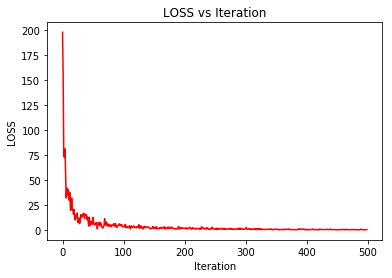

In [123]:
plt.plot(np.arange(num_steps),multi_losslist,'r')
plt.xlabel('Iteration')
plt.ylabel('LOSS')
plt.title("LOSS vs Iteration")
plt.legend()
plt.show()

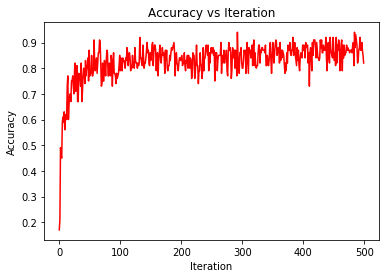

In [124]:
plt.plot(np.arange(num_steps),multi_accuracylist,'r')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Iteration")
plt.legend()
plt.show()

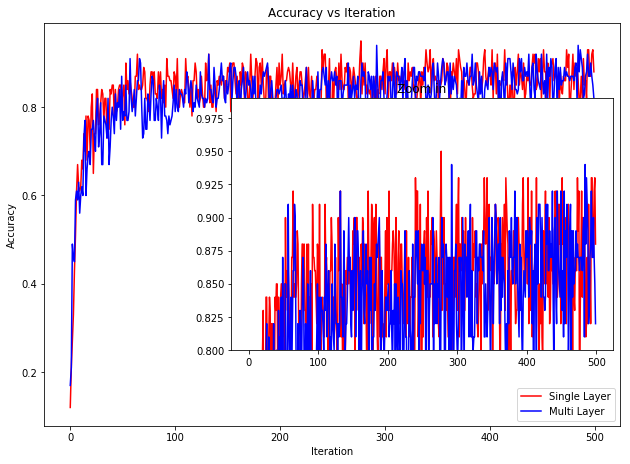

In [130]:
fig = plt.figure(figsize=(10,7))
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.36, 0.25, 0.53, 0.5])

axes1.plot(np.arange(num_steps),accuracylist_first,'r', label="Single Layer")
axes1.plot(np.arange(num_steps),multi_accuracylist,'b',label="Multi Layer")
axes1.set_xlabel('Iteration')
axes1.set_ylabel('Accuracy')
axes1.set_title("Accuracy vs Iteration")
axes1.legend()

# Plot zoom in graph
plt.ylim(ymax = 0.99, ymin = 0.80)
axes2.plot(np.arange(num_steps), accuracylist_first,'r', label='Single Layer')
axes2.plot(np.arange(num_steps), multi_accuracylist,'b', label='Multi Layer')
axes2.set_title('Zoom in');

As we saw with increasing of number of hidden layers the accuracy will increase, for example here accuracy in the model with 2 hidden layers was better than a single model.